Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
SVD: 0.9367
SVDpp: 0.9201
NMF: 0.9658
KNNBasic: 0.9799
CoClustering: 0.9665


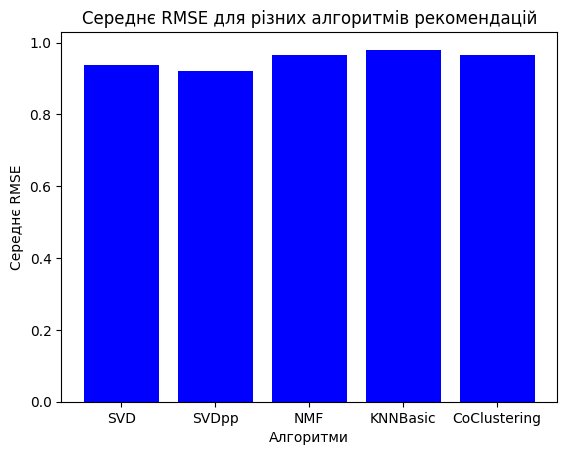

Найкращий алгоритм: SVDpp з RMSE: 0.9201


In [15]:
!pip install scikit-surprise

from surprise import SVD, SVDpp, NMF, KNNBasic, CoClustering
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate

# Задаємо читача для датасету
reader = Reader(line_format='user item rating timestamp', sep='\t')

# Завантажуємо набір даних "ml-100k" прямо в середовище Google Colab
data = Dataset.load_builtin(name='ml-100k', prompt=False)

# Алгоритми для оцінки
algos = [SVD(), SVDpp(), NMF(), KNNBasic(), CoClustering()]

# Словник для зберігання значень RMSE для кожного алгоритму
rmse_values = {}

# Крос-валідація для кожного алгоритму та збереження середнього значення RMSE
for algo in algos:
    results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_values[algo.__class__.__name__] = round(results['test_rmse'].mean(), 4)

# Вивід значень RMSE
for algo, rmse in rmse_values.items():
    print(f'{algo}: {rmse}')

# Візуалізація результатів
import matplotlib.pyplot as plt

algos_names = list(rmse_values.keys())
rmse_scores = list(rmse_values.values())

plt.bar(algos_names, rmse_scores, color='blue')
plt.xlabel('Алгоритми')
plt.ylabel('Середнє RMSE')
plt.title('Середнє RMSE для різних алгоритмів рекомендацій')
plt.show()

# Вибір алгоритму з найменшим значенням RMSE
best_algorithm = min(rmse_values, key=rmse_values.get)
print(f'Найкращий алгоритм: {best_algorithm} з RMSE: {rmse_values[best_algorithm]}')
